In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
from matplotlib import font_manager, rc
import matplotlib as mpl

# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] == 'MS Gothic'

False

## 예시

In [25]:
# 한국인, 일본인 각 성인 100명 육류 소비량 데이터 생성

np.random.randn(1000)  # 0~1 사이 가상의 데이터 1000개 생성

meat_consumption_kor = np.random.randn(1000) + 54
meat_consumption_jpn = np.random.randn(1000) + 32

In [26]:
# 데이터 프레임 생성
raw = pd.DataFrame({'한국인': meat_consumption_kor,
              '일본인': meat_consumption_jpn})

df = raw.copy()
df.head(3)

,한국인,일본인
0,52.309381,31.699643
1,53.664183,32.590076
2,55.070145,31.440806


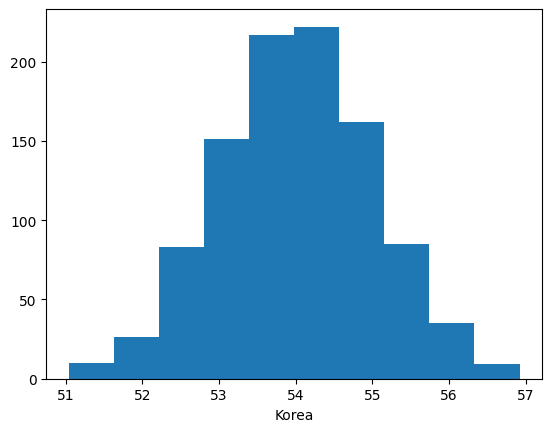

In [27]:
# 한국인 육류 소비량 히스토그램

plt.hist(meat_consumption_kor)
plt.xlabel('Korea')
plt.show()

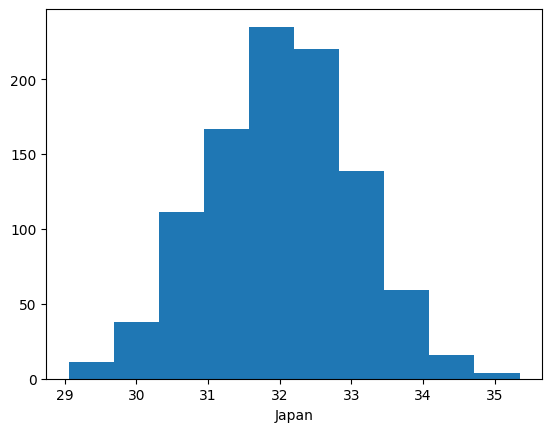

In [28]:
plt.hist(meat_consumption_jpn)
plt.xlabel('Japan')
plt.show()

In [29]:
# 표준 정규화 함수 zscore() 함수 이용
# 기존 데이터프레임 데이터에 새 열 생성(zscore 즉 데이터표준화 한 컬럼 추가)

import scipy.stats as ss
df['한국인정규화'] = ss.zscore(meat_consumption_kor)
df['일본인정규화'] = ss.zscore(meat_consumption_jpn)

In [30]:
df.head(3)

,한국인,일본인,한국인정규화,일본인정규화
0,52.309381,31.699643,-1.698938,-0.307959
1,53.664183,32.590076,-0.345098,0.554531
2,55.070145,31.440806,1.059865,-0.558673


In [31]:
# 표준정규화 수식 활용
# (x-x_bar) / sigma >> zscore
df['한국인정규화_수식']=\
(meat_consumption_kor - np.mean(meat_consumption_kor)) / np.std(meat_consumption_kor)
df['일본인정규화_수식']=\
(meat_consumption_jpn - np.mean(meat_consumption_jpn)) / np.std(meat_consumption_jpn)

In [32]:
df.head(3)

,한국인,일본인,한국인정규화,일본인정규화,한국인정규화_수식,일본인정규화_수식
0,52.309381,31.699643,-1.698938,-0.307959,-1.698938,-0.307959
1,53.664183,32.590076,-0.345098,0.554531,-0.345098,0.554531
2,55.070145,31.440806,1.059865,-0.558673,1.059865,-0.558673


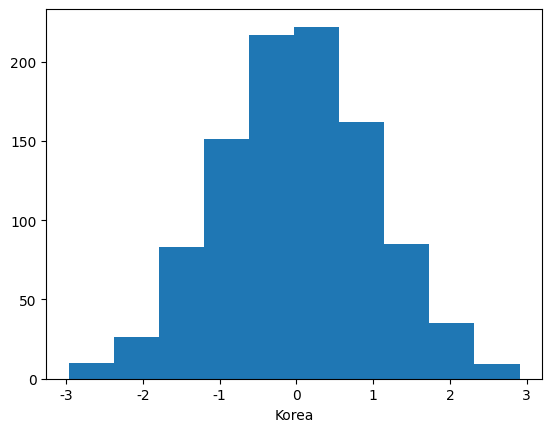

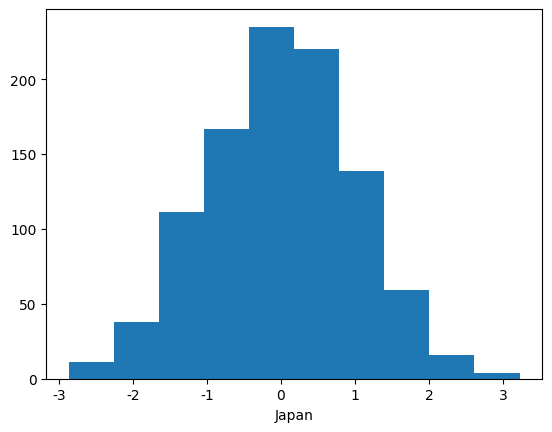

In [33]:
# 표준화된 데이터에 대한 히스토그램 그리기

plt.hist(df['한국인정규화'])
plt.xlabel('Korea')
plt.show()

plt.hist(df['일본인정규화'])
plt.xlabel('Japan')
plt.show()

In [34]:
# 사이킷런 스케일러 활용 정규화(*** 암기할 것)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['한국인정규화_사이킷런_표준화'] = scaler.fit_transform(df[['한국인']])  # 2차원 이여야 함.
df['일본인정규화_사이킷런_표준화'] = scaler.fit_transform(df[['일본인']])

In [35]:
df.head()

,한국인,일본인,한국인정규화,일본인정규화,한국인정규화_수식,일본인정규화_수식,한국인정규화_사이킷런_표준화,일본인정규화_사이킷런_표준화
0,52.309381,31.699643,-1.698938,-0.307959,-1.698938,-0.307959,-1.698938,-0.307959
1,53.664183,32.590076,-0.345098,0.554531,-0.345098,0.554531,-0.345098,0.554531
2,55.070145,31.440806,1.059865,-0.558673,1.059865,-0.558673,1.059865,-0.558673
3,54.574175,31.124642,0.564248,-0.864916,0.564248,-0.864916,0.564248,-0.864916
4,54.427512,33.253019,0.417689,1.196670,0.417689,1.196670,0.417689,1.196670


In [36]:
df[['한국인']]

,한국인
0,52.309381
1,53.664183
2,55.070145
3,54.574175
4,54.427512
...,...
995,55.527904
996,56.430404
997,53.737387
998,53.580241


In [37]:
# 정규화 : min-max ( min : 0 , max : 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['한국인정규화_사이킷런_최소최대'] = scaler.fit_transform(df[['한국인']])  # 2차원 이여야 함.
df['일본인정규화_사이킷런_최소최대'] = scaler.fit_transform(df[['일본인']])

In [38]:
df.head(3)

,한국인,일본인,한국인정규화,일본인정규화,한국인정규화_수식,일본인정규화_수식,한국인정규화_사이킷런_표준화,일본인정규화_사이킷런_표준화,한국인정규화_사이킷런_최소최대,일본인정규화_사이킷런_최소최대
0,52.309381,31.699643,-1.698938,-0.307959,-1.698938,-0.307959,-1.698938,-0.307959,0.215819,0.420247
1,53.664183,32.590076,-0.345098,0.554531,-0.345098,0.554531,-0.345098,0.554531,0.446330,0.561776
2,55.070145,31.440806,1.059865,-0.558673,1.059865,-0.558673,1.059865,-0.558673,0.685544,0.379106


In [39]:
min_ = np.min(meat_consumption_kor)
max_ = np.max(meat_consumption_kor)
df['한국인_수식_최대최소']= (df[['한국인']] - min_) / (max_ - min_)

min_ = np.min(meat_consumption_jpn)
max_ = np.max(meat_consumption_jpn)
df['일본인_수식_최대최소']= (df[['일본인']] - min_) / (max_ - min_)

df.head(3)

,한국인,일본인,한국인정규화,일본인정규화,한국인정규화_수식,일본인정규화_수식,한국인정규화_사이킷런_표준화,일본인정규화_사이킷런_표준화,한국인정규화_사이킷런_최소최대,일본인정규화_사이킷런_최소최대,한국인_수식_최대최소,일본인_수식_최대최소
0,52.309381,31.699643,-1.698938,-0.307959,-1.698938,-0.307959,-1.698938,-0.307959,0.215819,0.420247,0.215819,0.420247
1,53.664183,32.590076,-0.345098,0.554531,-0.345098,0.554531,-0.345098,0.554531,0.446330,0.561776,0.446330,0.561776
2,55.070145,31.440806,1.059865,-0.558673,1.059865,-0.558673,1.059865,-0.558673,0.685544,0.379106,0.685544,0.379106


In [40]:
# USJudegeRatings.csv
path = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USJudgeRatings.csv'

In [41]:
raw  = pd.read_csv(path)

In [42]:
df = raw.copy()

In [43]:
df.head(3)

,rownames,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8


In [44]:
df.columns

Index(['rownames', 'CONT', 'INTG', 'DMNR', 'DILG', 'CFMG', 'DECI', 'PREP',
       'FAMI', 'ORAL', 'WRIT', 'PHYS', 'RTEN'],
      dtype='object')

In [45]:
import scipy.stats as ss

# 지정한 컬럼 왜도(skew) 계산
print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


In [53]:
(df['PHYS']+1)[:10]

0     9.3
1     9.5
2     8.9
3     9.8
4     6.5
5     9.6
6    10.1
7     7.8
8     9.8
9     9.5
Name: PHYS, dtype: float64

In [54]:
np.max(df['PHYS'] + 1)
# 모든 열의 값에 1 더한 후 최대값 구하기

10.1

In [ ]:
np.max(df['PHYS'] + 1) - df['PHYS']
# 원래 값이 클수록 결과 값이 작아지고, 원래 값이 작으면 결과 값은 커지는 효과.

In [55]:
np.log(np.max(df['PHYS'] + 1) - df['PHYS'])

0     0.587787
1     0.470004
2     0.788457
3     0.262364
4     1.526056
5     0.405465
6     0.000000
7     1.193922
8     0.262364
9     0.470004
10    0.530628
11    1.163151
12    0.693147
13    1.360977
14    0.530628
15    0.741937
16    1.163151
17    0.693147
18    0.741937
19    1.064711
20    0.955511
21    0.993252
22    1.686399
23    0.832909
24    0.336472
25    0.095310
26    0.587787
27    0.262364
28    0.530628
29    0.182322
30    0.530628
31    0.693147
32    0.336472
33    0.262364
34    1.335001
35    0.741937
36    0.693147
37    0.470004
38    0.741937
39    0.693147
40    0.916291
41    0.587787
42    0.832909
Name: PHYS, dtype: float64

In [51]:
# 변수 변환 - 로그 변환

df['CONT_log'] = np.log(df['CONT'])
df['PHYS_log'] = np.log(np.max(df['PHYS'] + 1) - df['PHYS'])

# / log + 0.256887

print(df['CONT_log'])
print(df['PHYS_log'])

# 이 변환은 변수의 값들이 한쪽으로 치우쳐 있거나, 최대값 근처에 몰려있을때 사용.
# 값들을 역순으로 바꾸어 로그 변환을 적용한 것입니다.
# 이 변환을 통해 데이터의 분포를 더 균등하게 만들 수 있습니다.

# 결론적으로, 이러한 로그 변환은 데이터의 분포를 조정하고, 
# 모델의 성능을 향상시키기 위해 사용됩니다. 
# 데이터가 극단적인 값이나 비대칭적인 분포를 가질 때 특히 유용합니다.

0     1.740466
1     1.916923
2     1.974081
3     1.916923
4     1.987874
5     1.824549
6     2.360854
7     1.945910
8     1.987874
9     2.104134
10    1.945910
11    1.871802
12    1.902108
13    1.945910
14    1.871802
15    1.987874
16    2.079442
17    2.041220
18    2.116256
19    2.261763
20    1.960095
21    2.028148
22    1.887070
23    1.824549
24    2.014903
25    2.054124
26    1.960095
27    2.014903
28    2.014903
29    1.960095
30    1.887070
31    2.128232
32    1.931521
33    1.987874
34    2.041220
35    2.140066
36    1.931521
37    1.871802
38    2.116256
39    2.116256
40    2.197225
41    1.960095
42    2.151762
Name: CONT_log, dtype: float64
0     0.587787
1     0.470004
2     0.788457
3     0.262364
4     1.526056
5     0.405465
6     0.000000
7     1.193922
8     0.262364
9     0.470004
10    0.530628
11    1.163151
12    0.693147
13    1.360977
14    0.530628
15    0.741937
16    1.163151
17    0.693147
18    0.741937
19    1.064711
20    0.955511
21    0.9

In [56]:
# 왜도 계산

print(ss.skew(df['CONT_log']))
print(ss.skew(df['PHYS_log']))

0.6555571886692603
0.5824357748750443


In [79]:
# 수학 점수(Math_score)

data = [["철수",52], ["영희",92], ["미영",84], ["시완",71], ["미경",65],
        ["영환",81], ["숙경",66], ["부영",77], ["민섭",73], ["보연",74]]

# print(data)

df = pd.DataFrame(data, columns = ['이름','수학점수'])
print(df)

print(np.mean(df['수학점수']))

   이름  수학점수
0  철수    52
1  영희    92
2  미영    84
3  시완    71
4  미경    65
5  영환    81
6  숙경    66
7  부영    77
8  민섭    73
9  보연    74
73.5


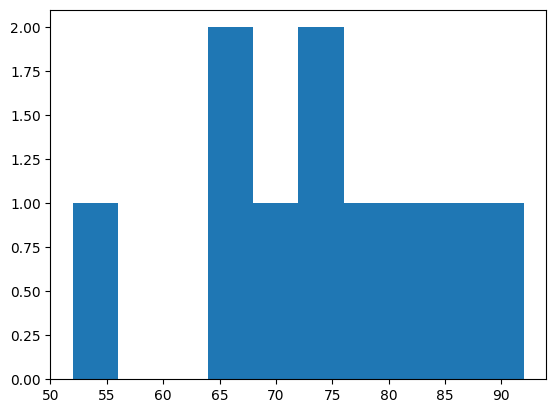

In [80]:
plt.hist(df['수학점수'])
plt.show()

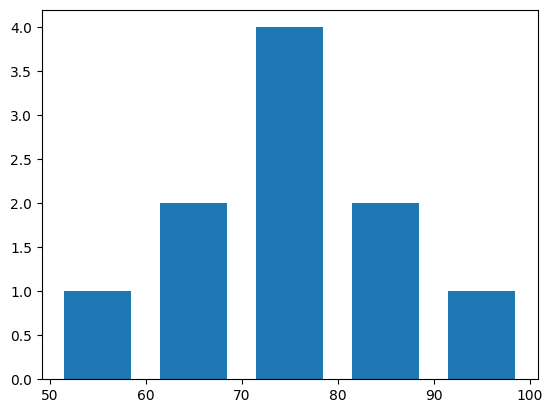

In [81]:
# 히스토그램 (범위 50 ~ 100, 5개 구간)
plt.hist(df['수학점수'], bins=5, range=[50,100], rwidth=0.7)
# rwidth(그래프 폭 조절하는 기능, 생략시 default = 1)
plt.show()

In [82]:
df.head()

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65


In [83]:
df.loc[df['수학점수'] < 60 , '등급']  = 'F'
df.loc[(df['수학점수'] >= 60) & (df['수학점수'] < 70 ),'등급']  = 'D'
df.loc[(df['수학점수'] >= 70) & (df['수학점수'] < 80 ),'등급']  = 'C'
df.loc[(df['수학점수'] >= 80) & (df['수학점수'] < 90 ),'등급']  = 'B'
df.loc[(df['수학점수'] >= 90) & (df['수학점수'] <= 100 ),'등급']  = 'A'

In [84]:
df.head()

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D


In [85]:
# CUT
df['등급_cut'] = pd.cut(x=df['수학점수'], bins=[0,60,70,80,90,100], 
                  labels = ['F','D','C','B','A'],
                  include_lowest=True)

In [86]:
df.head()

,이름,수학점수,등급,등급_cut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,B
3,시완,71,C,C
4,미경,65,D,D


In [87]:
# Qcut
df['등급_QCUT'] = pd.qcut(x=df['수학점수'],
                        q=5, 
                        labels = ['F','D','C','B','A'])

In [88]:
df.head()

,이름,수학점수,등급,등급_cut,등급_QCUT
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F
